### ANÁLISE DE VARIÁVEIS EM REGRESSÃO LINEAR

### Este projeto é baseado em um desafio temático em que uma empresa montadora de veículos irá entrar no mercado dos EUA e deseja saber quais são as características que mais afetam o preço de um carro no novo mercado. O objetivo deste trabalho é utilizar análise exploratória e métodos estatísticos para encontrar quais são as variáveis mais importantes para o plano de negócios da empresa. Dessa forma, o foco não será no desempenho, tunagem e comparação de modelos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_car = pd.read_csv('CarPrice_Assignment.csv')
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df_car.describe(include = 'O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
df_car['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Vamos criar a coluna BrandName (nome das marcas) com base na coluna CarName

In [8]:
df_car['BrandName'] = df_car['CarName'].str.split(' ').str[0]

In [9]:
df_car['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
df_car['BrandName'] = df_car['BrandName'].str.lower()

In [11]:
df_car['BrandName'] = df_car['BrandName'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota', \
                                                   'vokswagen':'volkswagen','vw':'volkswagen'})

In [12]:
df_car['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Iniciaremos a análise exploratória por meio de gráficos de distribuição e boxplots.



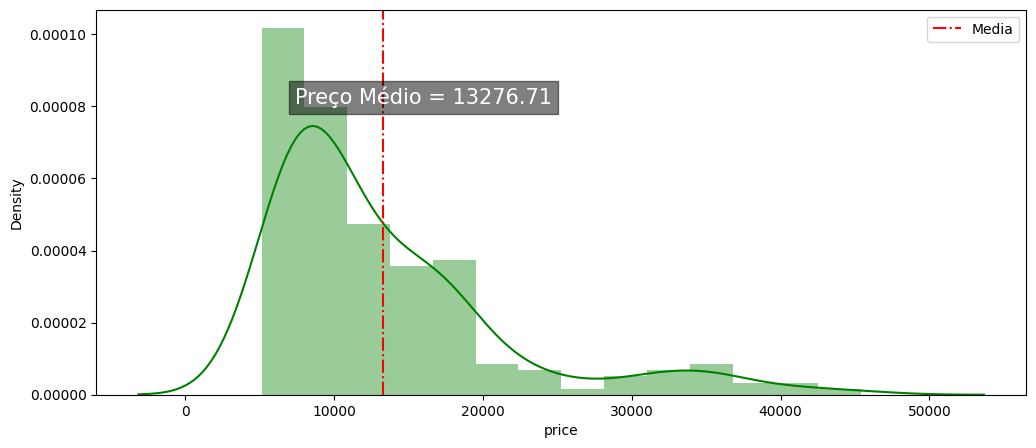

In [13]:
sns.set_style='darkgrid'
plt.figure(figsize=(12,5))
distribuicao_preco = sns.distplot(df_car['price'], kde=True, color='green')
media = plt.axvline(df_car['price'].mean(), c='red', linestyle='dashdot', label='Media')
plt.text(0.49, 0.8, f'Preço Médio = {df_car.price.mean():.2f}', transform=plt.gca().transAxes, color='white', fontsize=15,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='black',alpha=0.5))
plt.legend()
plt.show()

### Vemos pela distribuição que os preços são assimétricos à esquerda, com média de $13276.71

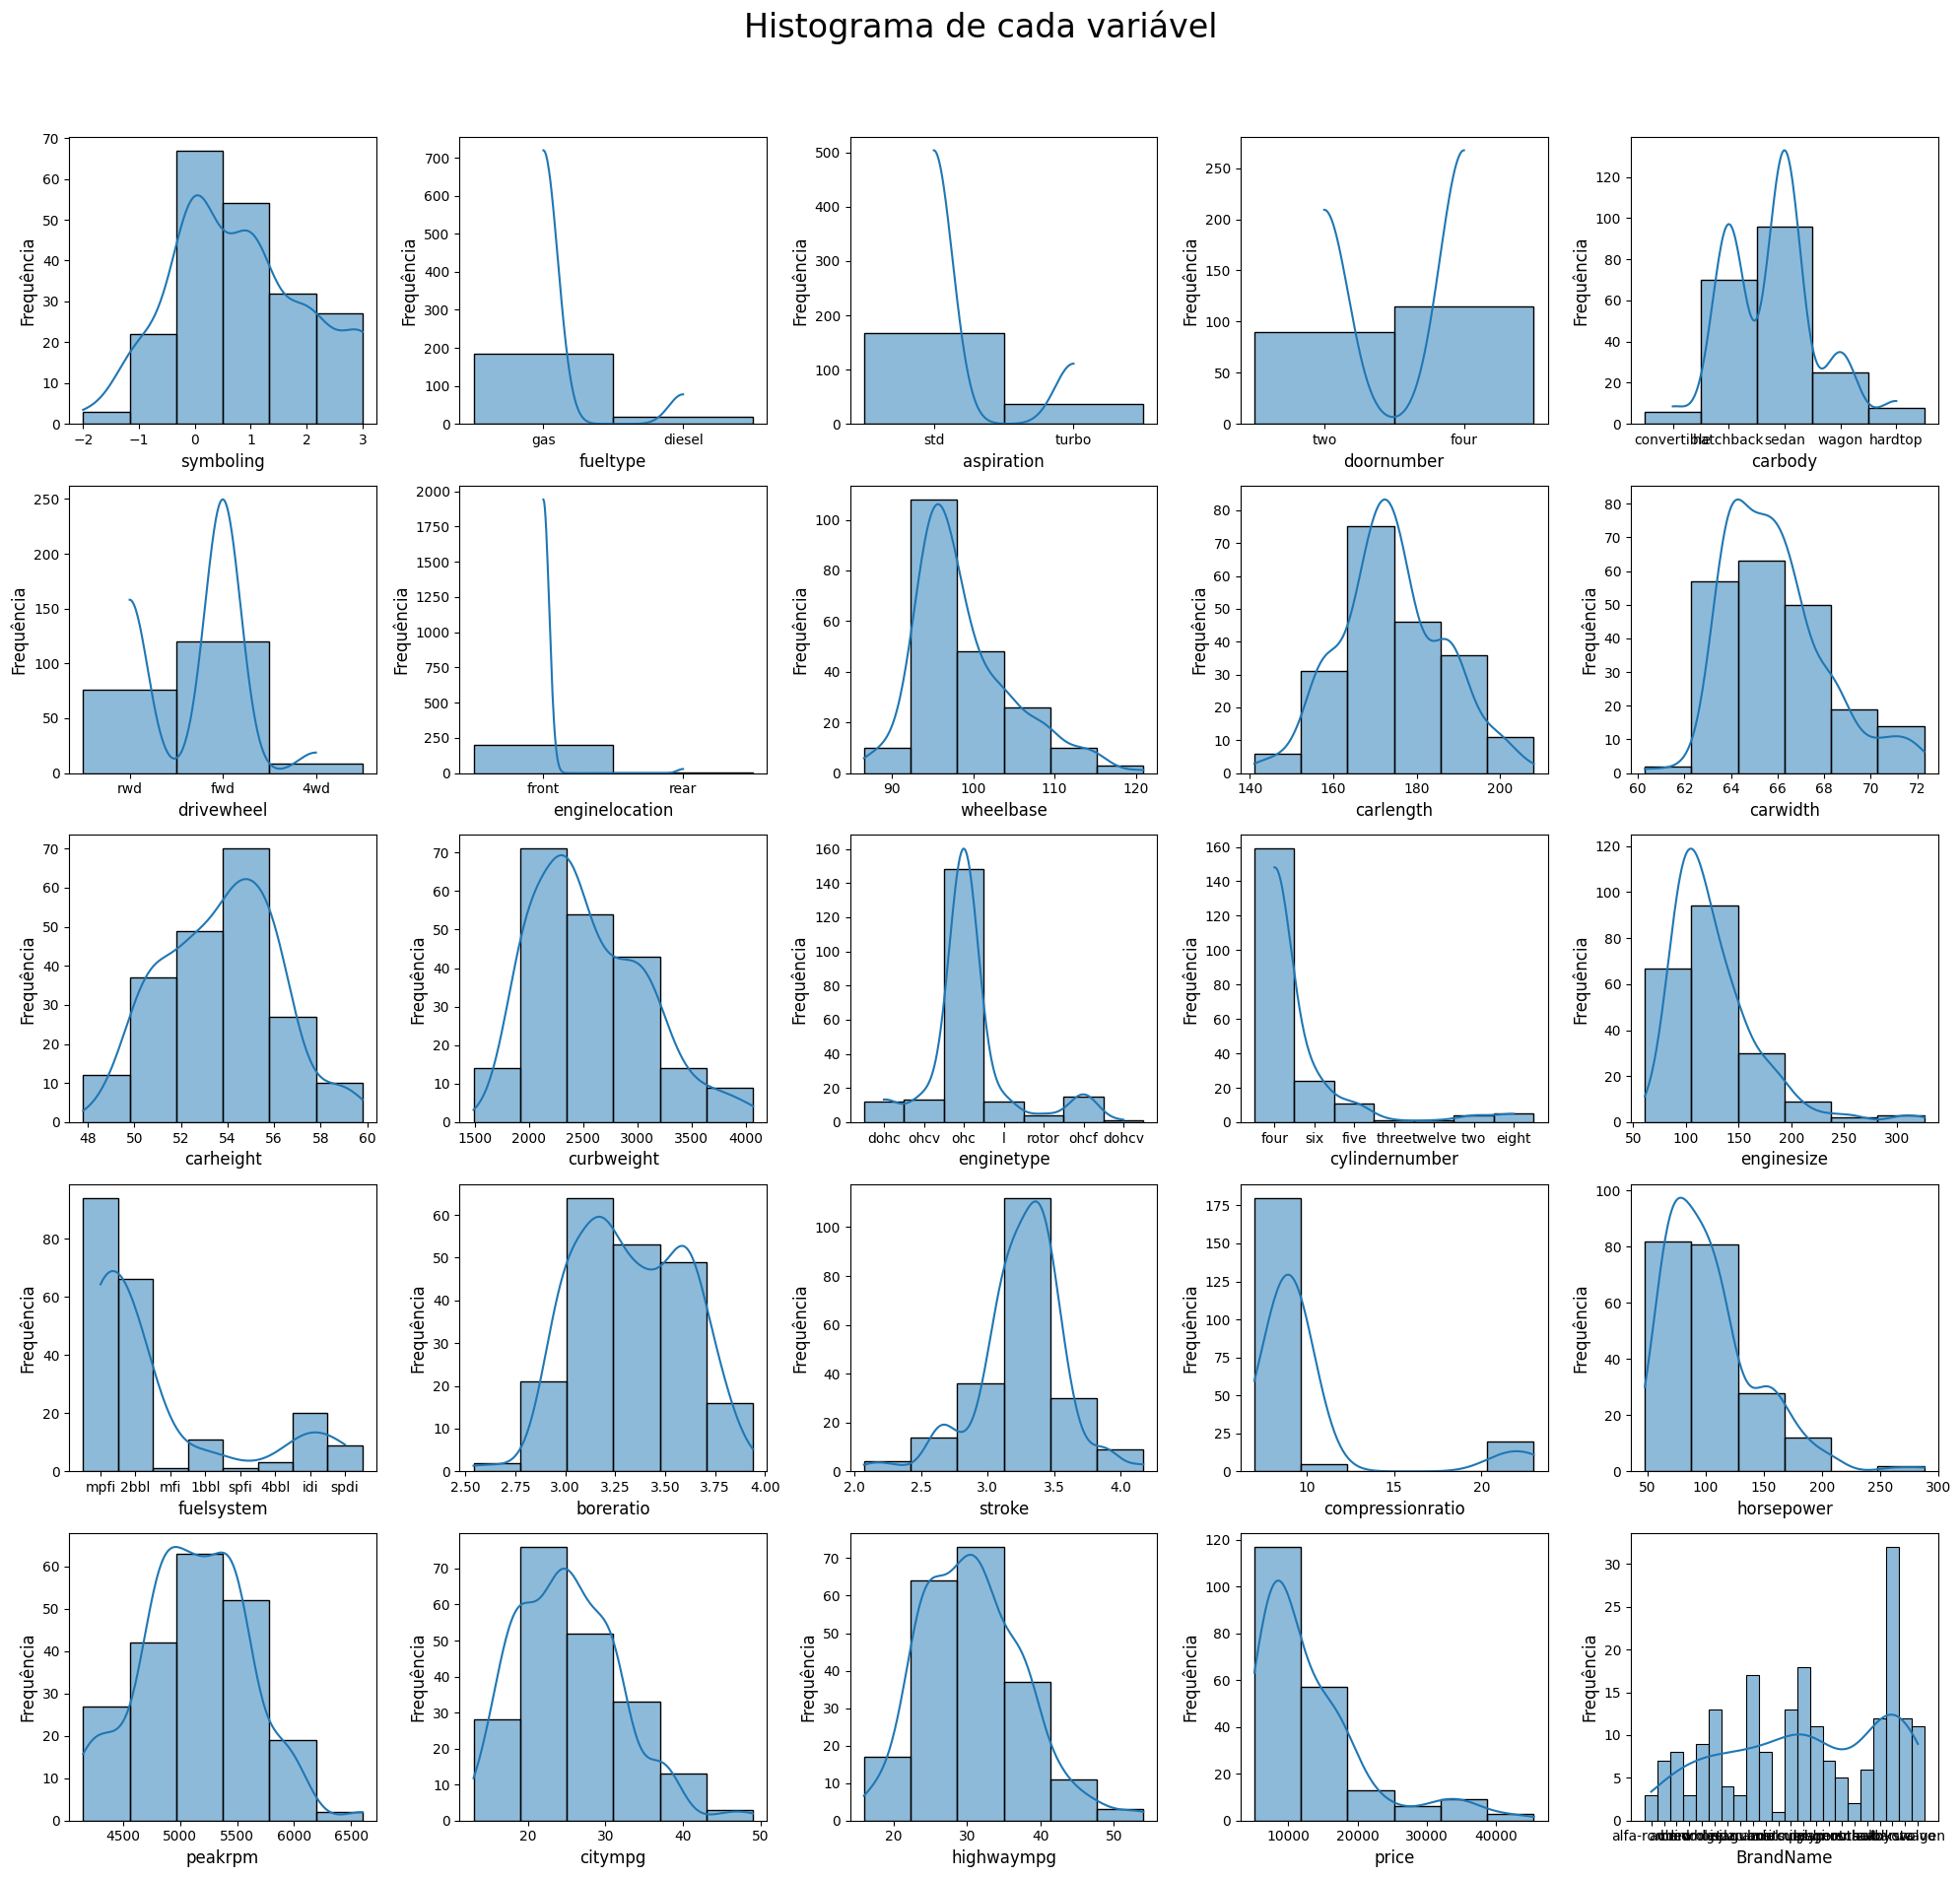

In [14]:
from random import randint

colunas_hist = [col for col in df_car.columns if col not in ['car_ID', 'CarName', 'brandname']]

num_subplots = len(colunas_hist)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(5, num_subplots)

fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograma de cada variável", size=24)

cores = sns.light_palette('seagreen', n_colors=len(colunas_hist)+1, reverse=True)

for i in range(num_rows):
    for x in range(num_cols):
        id = i * num_cols + x
        if id < num_subplots:
            sns.histplot(df_car[colunas_hist[id]], ax=axis[i, x], kde=True, bins=6, palette=[cores[id]])
            axis[i, x].set_xlabel(colunas_hist[id], fontsize=12)
            axis[i, x].set_ylabel("Frequência", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### As distribuições nos permitem entender como cada variável se comporta e quais são as características mais comuns nos carros do mercado local.

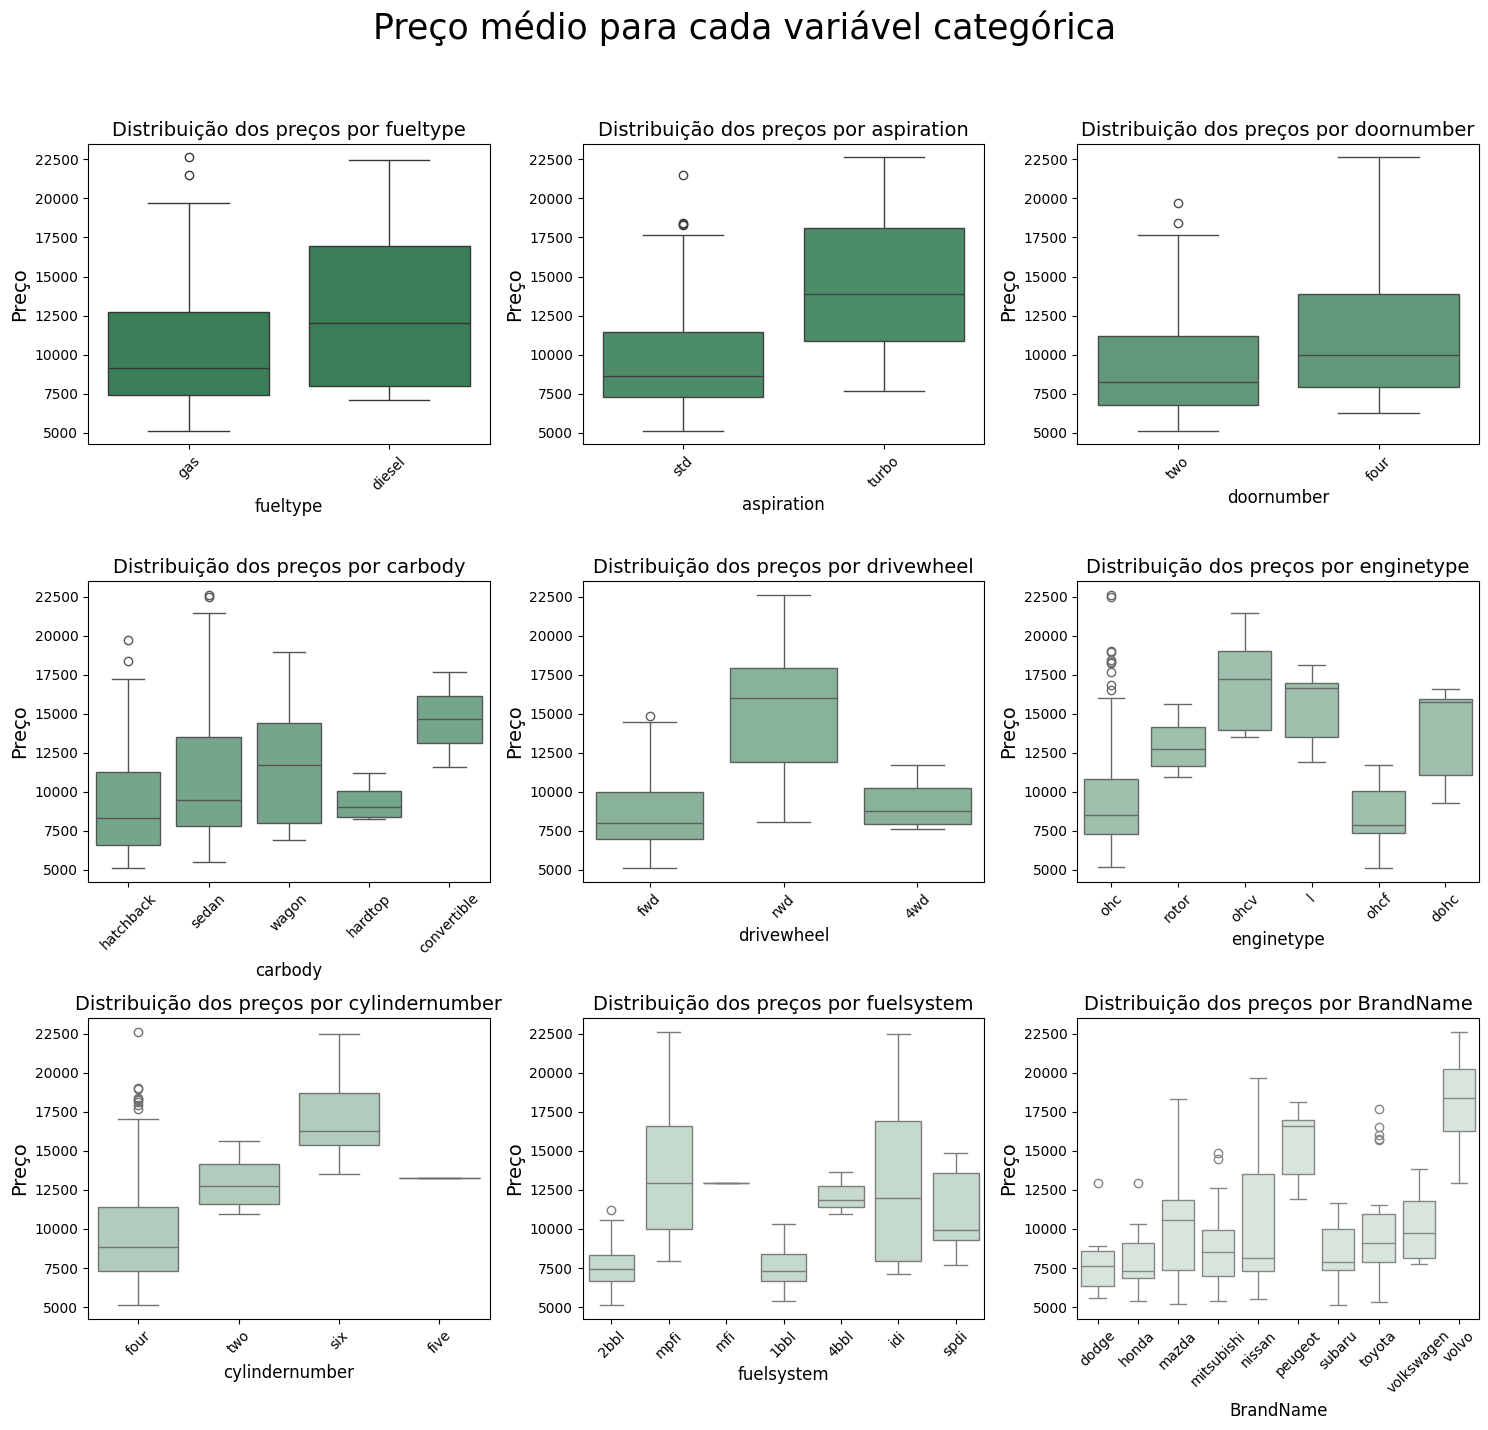

In [15]:
variaveis_categoricas = df_car.select_dtypes(include=['object']).columns

colunas_categoricas = [col for col in variaveis_categoricas if col not in ['CarName', 'enginelocation']]

num_subplots = len(colunas_categoricas)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axis = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Preço médio para cada variável categórica", size=25)

cores = sns.light_palette('seagreen', n_colors=len(colunas_categoricas)+1, reverse=True)

for i in range(num_rows):
    for x in range(num_cols):
        id = i * num_cols + x
        if id < num_subplots:
            top_marcas = df_car['BrandName'].value_counts().nlargest(10).index
            df_filtrada_marcas = df_car[df_car['BrandName'].isin(top_marcas)]

            sns.boxplot(x=colunas_categoricas[id], y='price', data=df_filtrada_marcas, ax=axis[i, x], palette=[cores[id]])
            axis[i, x].set_title(f'Distribuição dos preços por {colunas_categoricas[id]}', fontsize=14)
            axis[i, x].set_xlabel(colunas_categoricas[id], fontsize=12)
            axis[i, x].set_ylabel("Preço", fontsize=14)
            axis[i, x].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Os boxplots das variáveis categóricas indicam algumas informações importantes. Em primeiro lugar, vemos a presença de outliers para a categoria dhc de enginetype (tipo de motor) e para cylindernumber (número de cilindradas). O carro mais barato da marca Volvo ainda é mais caro do que boa parte das outras marcas, da mesma forma que a marca Peugeout, que, no entanto, não possui carros tão caros quanto da marca Volvo. Há carros da marca Toyota que são outliers muito superiores à maioria de seus carros. Com a análise dos boxplots é possível ter uma pista sobre quais fatores influenciam o preço de um carro, porém, ainda não podemos tirar nenhuma conclusão.

### Iremos agora gerar a matriz de correlação entre as variáveis

<Figure size 4000x3000 with 0 Axes>

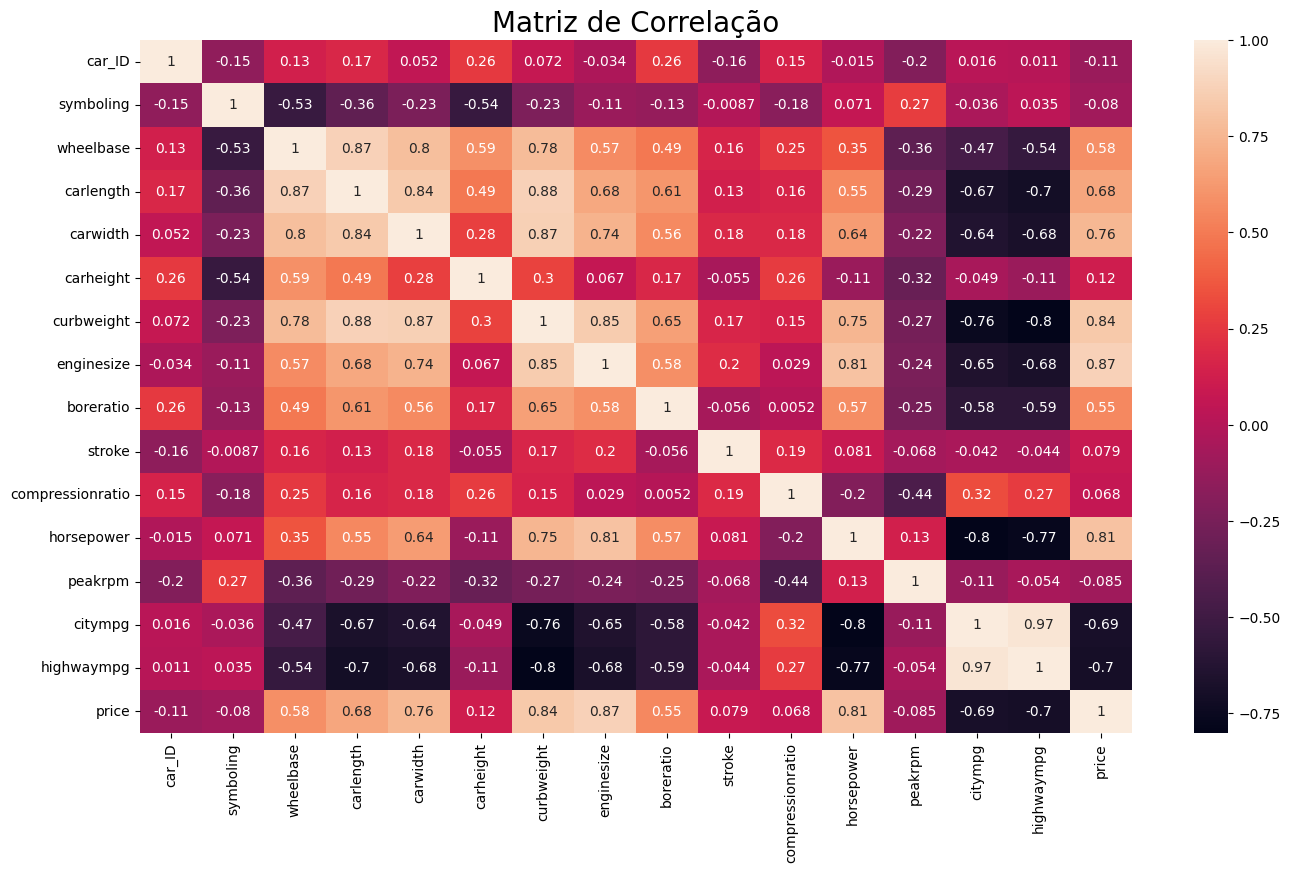

In [20]:
plt.figure(figsize=(40, 30))
fig, ax = plt.subplots(figsize=(16,9))
matriz_corr = sns.heatmap(df_car.select_dtypes(exclude='object').corr(), annot=True, annot_kws={"size": 10})
matriz_corr.set_title('Matriz de correlação', fontdict={'fontsize':25}, pad=10)
plt.title("Matriz de Correlação", size=20)
plt.show()

In [23]:
corr = df_car.corr()
corr.query('price > 0.6')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
horsepower,-0.015006,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
price,-0.109093,-0.079978,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


### Com base na análise da matriz de correlação, temos que as cinco variáveis que mais se correlacionam com o preço são carlenght (comprimento do carro), carwidth (largura do carro), curbweight (peso do carro vazio), enginesize (tamanho do motor), e horsepower (cavalos de potência). Também está presente uma forte correlação entre variáveis, o que representa um alto risco de multicolinearidade. A interpretação das variáveis por meio da correlação não é a ideal para esse caso, podendo nos levar a correlações espúrias.

### Iremos agora transformar as variáveis categóricas em númericas, escalonar os dados e testar um primeiro modelo de regressão.

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
le = LabelEncoder()
from sklearn.model_selection import train_test_split

In [25]:
lista_cat = df_car.select_dtypes(include='object').columns

In [26]:
for cat in lista_cat:
  df_car[cat] = le.fit_transform(df_car[cat])

In [27]:
x = df_car.drop(columns=['price', 'car_ID'], axis=1)
y = df_car['price']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

x_treino = pd.DataFrame(scaler.fit_transform(x_treino), index = x_treino.index, columns=x_treino.columns)
X_teste = pd.DataFrame(scaler.transform(x_teste), index= x_teste.index, columns=x_teste.columns)

In [28]:
import statsmodels.api as sm

x_treino = sm.add_constant(x_treino)
model = sm.OLS(y_treino, x_treino).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     49.35
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.24e-50
Time:                        19:20:25   Log-Likelihood:                -1309.7
No. Observations:                 143   AIC:                             2671.
Df Residuals:                     117   BIC:                             2748.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.341e+04    212.427  

### Nesta regressão inicial temos um R² de 92%, o que quer dizer que as variáveis deste modelo explicam 92% da variação dos preços de automóveis. Contudo, nosso objetivo é encontrar aquelas variáveis que melhor explicam a variação dos preços. Analisando os coeficientes e o valor de P, podemos notar que algumas variáveis não parecem ter significância do resultado. Entretanto, temos indícios de multicolinearidade dada a alta correlação entre variáveis. Iremos aplicar o teste VIF para verificar. Adotaremos 10 como valor limite para atestar a não presença de multicolinearidade

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
teste_vif = pd.DataFrame()
teste_vif['variáveis'] = x_treino.columns
teste_vif["VIF"] = [variance_inflation_factor(x_treino.values, i) for i in range(len(x_treino.columns))]

In [31]:
teste_vif

,variáveis,VIF
0,const,1.000000
1,symboling,3.071122
2,CarName,33.352634
3,fueltype,92.661869
4,aspiration,3.159916
5,doornumber,3.350461
6,carbody,3.038223
7,drivewheel,2.933949
8,enginelocation,1.655539
9,wheelbase,12.066592


### Como podemos ver, algumas variáveis superaram o limite estipulado. Iremos excluir estas variáveis e continuar nossos testes.

In [32]:
vif_excluir = teste_vif.query('VIF > 10')
lista_excluir = vif_excluir['variáveis'].to_list()

In [33]:
df_vif_limite = x_treino.drop(columns=lista_excluir, axis=1)
df_vif_limite

,const,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,peakrpm
177,1.0,-1.5000,-0.482451,-0.887412,-0.733236,-0.641236,-0.119098,0.235105,0.043859,0.076296,-0.142554,0.812134,-0.038909,0.921956,-1.966167
75,1.0,0.1250,2.072751,1.126872,-0.733236,1.192700,-0.119098,0.924984,0.408026,0.076296,-0.142554,0.812134,1.692945,-0.448994,-0.318332
174,1.0,-1.5000,2.072751,-0.887412,0.431794,-0.641236,-0.119098,0.235105,0.448489,0.076296,-0.142554,-0.172062,-0.186301,0.301764,-1.348229
31,1.0,0.9375,-0.482451,1.126872,-0.733236,-0.641236,-0.119098,-0.960684,-1.210497,0.076296,-0.142554,-1.648356,-1.512828,0.497614,1.741462
12,1.0,-0.6875,-0.482451,1.126872,0.431794,1.192700,-0.119098,-0.546757,0.205711,0.076296,1.216457,0.812134,-0.038909,-0.220503,-1.863177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.1250,-0.482451,1.126872,-0.733236,1.192700,-0.119098,0.878992,-1.655591,1.894672,1.216457,0.812134,0.403266,0.040631,0.093627
14,1.0,0.1250,-0.482451,-0.887412,0.431794,1.192700,-0.119098,0.419073,0.772194,0.076296,1.216457,0.812134,-0.038909,-0.220503,-1.863177
92,1.0,0.1250,-0.482451,-0.887412,0.431794,-0.641236,-0.119098,-1.006675,0.286637,0.076296,-0.142554,-1.156258,-0.628477,0.105914,0.093627
179,1.0,1.7500,-0.482451,1.126872,-0.733236,1.192700,-0.119098,0.787008,-0.724940,-2.651269,1.216457,0.812134,-0.186301,0.301764,0.093627


In [34]:
df_vif_limite = sm.add_constant(df_vif_limite)
model = sm.OLS(y_treino, df_vif_limite).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     32.20
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.46e-35
Time:                        19:20:32   Log-Likelihood:                -1376.7
No. Observations:                 143   AIC:                             2783.
Df Residuals:                     128   BIC:                             2828.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.341e+04    324.516     41.

### O modelo encontrado teve um R² significativamente menor. Porém, dado o objetivo de encontrar as variáveis que mais influenciam no modelo, já temos um R² considerável. Temos algumas variáveis que devido ao valor de P não possuem significância. Iremos agora utilizar a técnica RFE (Recursive Feature Elimination) que busca testar diferentes combinações entre as variáveis para encontrar as que melhor explicam a variável dependente.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_vif_limite
y = y_treino

lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=6)
fit = rfe.fit(X, y)

rfe = pd.DataFrame(list(zip(X.columns,rfe.support_,rfe.ranking_)), columns = ["variável","rfe_support","ranking"])

In [36]:
rfe

,variável,rfe_support,ranking
0,const,False,10
1,symboling,False,2
2,aspiration,False,3
3,doornumber,False,6
4,carbody,True,1
5,drivewheel,True,1
6,enginelocation,True,1
7,carwidth,True,1
8,carheight,False,7
9,enginetype,False,5


In [37]:
variaveis_rfe_vif = df_vif_limite[['carbody', 'drivewheel','enginelocation','carwidth','cylindernumber','fuelsystem']]

In [38]:
variaveis_rfe_vif = sm.add_constant(variaveis_rfe_vif)
model = sm.OLS(y_treino, variaveis_rfe_vif).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     77.33
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.14e-41
Time:                        19:20:35   Log-Likelihood:                -1378.5
No. Observations:                 143   AIC:                             2771.
Df Residuals:                     136   BIC:                             2792.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.341e+04    318.726     42.

### O modelo com as variáveis indicadas pelo método RFE nos indica quais são as váriaveis que mais influenciam na variável dependente. Sendo assim, mesmo com a redução de variáveis o resultado de R² permanece em 77%. Notamos também que, pela estatística P, não é possível afirmar que fuelsystem e cylindernumber influenciam de fato os preços. Iremos testar agora o método RFE sobre o dataset sem a exclusão das variáveis indicadas pelo VIF.

In [39]:
X = x_treino
y = y_treino

rfe_teste_2 = RFE(lr, n_features_to_select=6)
fit = rfe_teste_2.fit(X, y)

rfe_teste_2 = pd.DataFrame(list(zip(X.columns,rfe_teste_2.support_,rfe_teste_2.ranking_)), columns = ["variável","rfe_support","ranking"])

In [40]:
rfe_teste_2

,variável,rfe_support,ranking
0,const,False,20
1,symboling,False,16
2,CarName,False,3
3,fueltype,True,1
4,aspiration,False,8
5,doornumber,False,10
6,carbody,False,6
7,drivewheel,False,15
8,enginelocation,True,1
9,wheelbase,False,5


In [41]:
descartar_rfe2 = rfe_teste_2.query('ranking != 1')
lista_descartar_rfe2 = descartar_rfe2['variável']
df_melhores_variaveis = x_treino.drop(columns = lista_descartar_rfe2, axis=1)

In [42]:
df_melhores_variaveis = sm.add_constant(df_melhores_variaveis)
model = sm.OLS(y_treino, df_melhores_variaveis).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.03e-56
Time:                        19:20:49   Log-Likelihood:                -1341.1
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     136   BIC:                             2717.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.341e+04    245.518  

### O resultado de R² com as variáveis selecionadas pelo RFE realizado com todas variáveis possui um R² mais alto. Devido ao valor de P iremos desconsiderar as variáveis fueltype (tipo de combustível) e compressionratio (relação de compressão). Faremos novamente o VIF para verificar multicolinearidade. A estatística T indica que apenas fueltype e compressionratio podem apresentar este problema, porém, vamos fazer o teste para formalizar.

In [43]:
teste_vif_2 = pd.DataFrame()
teste_vif_2['variáveis'] = df_melhores_variaveis.columns
teste_vif_2["VIF"] = [variance_inflation_factor(df_melhores_variaveis.values, i) for i in range(len(df_melhores_variaveis.columns))]

In [44]:
teste_vif_2

,variáveis,VIF
0,const,1.000000
1,fueltype,35.519821
2,enginelocation,1.138203
3,carwidth,3.524433
4,curbweight,6.580207
5,enginesize,4.217834
6,compressionratio,34.180892


### Após os testes realizados,  temos como resultado as variáveis: carbody, drivewheel, enginelocation e carwidth indicadas pelo RFE realizado no dataset com variáveis reduzidas de acordo com o método VIF. Já o teste RFE realizado no dataset completo indicou as variáveis: enginelocation, carwidth, curbweight e enginesize.

In [47]:
df_analise_final = x_treino[['carbody', 'drivewheel', 'enginelocation', 'carwidth', 'curbweight','enginesize']]

In [48]:
df_analise_final = sm.add_constant(df_analise_final)
model = sm.OLS(y_treino, df_analise_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     154.8
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.12e-58
Time:                        19:21:59   Log-Likelihood:                -1337.5
No. Observations:                 143   AIC:                             2689.
Df Residuals:                     136   BIC:                             2710.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.341e+04    239.259     56.

In [49]:
teste_vif_final = pd.DataFrame()
teste_vif_final['variáveis'] = df_analise_final.columns
teste_vif_final["VIF"] = [variance_inflation_factor(df_analise_final.values, i) for i in range(len(df_analise_final.columns))]

In [50]:
teste_vif_final

,variáveis,VIF
0,const,1.000000
1,carbody,1.336013
2,drivewheel,1.715920
3,enginelocation,1.156956
4,carwidth,3.502243
5,curbweight,7.343748
6,enginesize,4.299879


### Na última regressão deste modelo, juntando as variáveis encontradas pelo método RFE sobre o dataset reduzido com base no VIF e as variáveis encontradas pelo RFE no modelo original, conseguimos um R² de 87%, indicando que as variáveis carbody, drivewheel, enginelocation, carwidth, curbweight e enginesize são responsáveis por explicar 87% da variação dos preços de automóveis no mercado dos EUA. Além disso, o teste VIF não indica multicolinearidade entre as variáveis.

### Em conclusão, as variáveis selecionadas com base em métodos estatísticos para que a montadora de veículos realize seus estudos e plano de negócios serão: carbody, drivewheel, enginelocation, carwidth, curbweight e enginesize. Adicionalmente, podemos tirar insights da análise exploratória. Na entrega final do relatório, seria informado à empresa de que carros com estética e tecnologia semelhantes às da marca Nissan e Volvo e  de alguns modelos da Toyota podem custar um preço mais caro no mercado local. Além disso, o boxplot das variáveis aspiration e enginetype fortalecem a conclusão de que o motor é um dos fatores determinantes para o preço.